In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf

import sys

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.4.1
1.13.3
2.0.2


In [5]:
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [16]:
tf.reset_default_graph()

In [17]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

In [18]:
def show_reconstructed_digits(X, outputs, model_path = None):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[100 : 102]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 6))
    for i in range(2):
        plt.subplot(2, 2, i * 2 + 1)
        display_digit(X_test[i])
        plt.subplot(2, 2, i * 2 + 2)
        display_digit(outputs_val[i])

In [19]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150 
n_hidden3 = n_hidden1
n_outputs = n_inputs

In [20]:
noise_level = 0.5

In [21]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

X_noisy = X + noise_level * tf.random_normal(tf.shape(X))

In [22]:
from functools import partial

dense_layer = partial(tf.layers.dense,
                      activation=tf.nn.relu)

hidden1 = dense_layer(X_noisy, n_hidden1)
hidden2 = dense_layer(hidden1, n_hidden2)
hidden3 = dense_layer(hidden2, n_hidden3)

outputs = dense_layer(hidden3, n_outputs, activation=None)

In [23]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(0.01)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size

        for iteration in range(n_batches):
            X_batch, _ = mnist.train.next_batch(batch_size)

            sess.run(training_op, feed_dict={X: X_batch})

        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   
        print("\r{}".format(epoch), "Train MSE:", loss_train)

        saver.save(sess, "./denoising_gaussian_autoencoder.ckpt")        

0 Train MSE: 0.0363826
1 Train MSE: 0.0319765
2 Train MSE: 0.0317728
3 Train MSE: 0.0310729
4 Train MSE: 0.0323876
5 Train MSE: 0.0319978
6 Train MSE: 0.0314107
7 Train MSE: 0.0315057
8 Train MSE: 0.0322907
9 Train MSE: 0.0306518


INFO:tensorflow:Restoring parameters from ./denoising_gaussian_autoencoder.ckpt


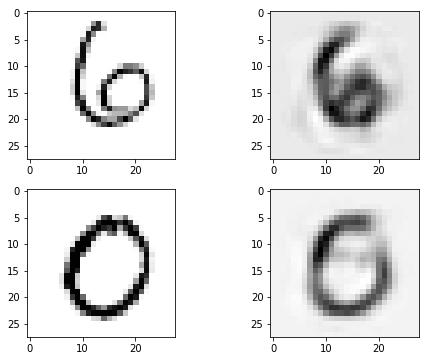

In [25]:
show_reconstructed_digits(X, outputs, "./denoising_gaussian_autoencoder.ckpt")